In [ ]:
pip install keras-beats

In [ ]:
pip install nbeats-keras

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
#df1 전처리
pd.set_option('max_rows', 100)
df1 = pd.read_csv('/content/drive/MyDrive/팔당댐/청담대교_보간.csv')
df1

,날짜,현재수위,유입량,저수량,공용량,방류량,강화대교_조위,청담대교_유량,잠수교_유량,한강대교_유량,행주대교_유량,대곡교_강수량,진관교_강수량,송정동_강수량,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위
0,2012-05-01 00:00:00,24.800,555.00,219.07,24.93,555.00,445.0,469.05,0.0,729.80,540.18,0.0,0.0,0.0,310.7,300.2,290.0,275.3
1,2012-05-01 00:10:00,24.794,464.60,218.86,25.15,562.90,449.0,498.00,0.0,731.48,540.18,0.0,0.0,0.0,314.7,300.2,290.0,275.3
2,2012-05-01 00:20:00,24.789,478.10,218.69,25.31,576.40,451.0,490.68,0.0,726.42,540.18,0.0,0.0,0.0,313.7,301.2,290.0,275.3
3,2012-05-01 00:30:00,24.789,464.80,218.69,25.31,563.10,452.0,476.21,0.0,726.42,552.17,0.0,0.0,0.0,311.7,301.2,290.0,276.3
4,2012-05-01 00:40:00,24.789,478.10,218.69,25.31,576.40,450.0,476.21,0.0,707.17,564.29,0.0,0.0,0.0,311.7,301.2,291.0,277.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276331,2022-07-18 23:10:00,25.040,259.23,212.86,31.14,259.23,510.0,319.84,NaN,-456.41,974.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276332,2022-07-18 23:20:00,25.040,260.46,212.86,31.14,260.46,492.0,314.01,NaN,-717.30,1006.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276333,2022-07-18 23:30:00,25.040,259.37,212.86,31.14,259.37,475.0,387.55,NaN,-843.37,1039.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276334,2022-07-18 23:40:00,25.040,259.13,212.86,31.14,259.13,458.0,454.91,NaN,-1023.37,1073.46,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

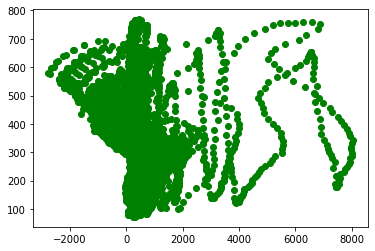

In [28]:
x = df1['한강대교_유량']
y = df1['강화대교_조위']
plt.scatter(x, y, color = 'g', marker = 'o')

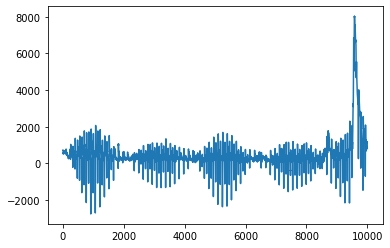

In [43]:
plt.plot(x)

In [41]:
df1 = df1.iloc[:269424]
df1['날짜'] = df1['날짜'].apply(lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [42]:
df1 = df1.set_index('날짜')

##모델링

In [ ]:
# 청담대교
from kerasbeats import prep_time_series, NBeatsModel
# import the dataset
df = df1
# sort by dates
df.sort_index(inplace = True)
# prep a univariate time series for N-Beats
X, y = prep_time_series(df['청담대교_수위'], lookback = 144, horizon = 1)
# create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
shuffle = False, test_size = 0.2)
# initialize N-Beats and fit

model = NBeatsModel(model_type = 'generic', lookback = 144, horizon = 1)

model.fit(X, y, epochs = 3)



Epoch 1/3
263/263 [==============================] - 994s 4s/step - loss: 353.3782 - mae: 353.3782 - mape: 110.5936
Epoch 2/3
263/263 [==============================] - 975s 4s/step - loss: 12.5446 - mae: 12.5446 - mape: 3.9280
Epoch 3/3
263/263 [==============================] - 980s 4s/step - loss: 6.6088 - mae: 6.6088 - mape: 2.0574


In [ ]:
a = model.predict(X_test)

In [ ]:
y_test

array([[295.7],
       [295.7],
       [295.7],
       ...,
       [278.7],
       [277.7],
       [278.7]])

In [ ]:
import joblib
joblib.dump(model, './model.pkl')

['./model.pkl']

In [ ]:
import joblib
model_from_joblib = joblib.load('./model.pkl')


NameError: ignored

In [ ]:
new_test = df1['청담대교_수위'].tail(144).values
new_test = new_test.reshape(1,144)

In [ ]:
pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tqdm import tqdm
import time

def nbeats_for(first_data):

  result = list()

  for i in tqdm(range(6912)):
    
    global new_test

    pred = round(float(model.predict(new_test)), 3)
    result.append(pred)
    new_test = np.append(new_test, pred)
    new_test = np.delete(new_test,0)
    new_test = new_test.reshape(1,144)

  return result

In [ ]:
first_data = new_test

nbeats_for(first_data)

In [ ]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(y_test, a)**0.5
RMSE

In [ ]:
a pd.read_csv('')

In [ ]:
#6912. (6912,n) >>> (6912,1)
# n = lookback
df1.iloc[269424:]

In [ ]:
# 잠수교
from kerasbeats import prep_time_series, NBeatsModel
# import the dataset
df = df1
# sort by dates
df.sort_index(inplace = True)
# prep a univariate time series for N-Beats
X, y = prep_time_series(df['잠수교_수위'], lookback = 7, horizon = 1)
# create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
shuffle = False, test_size = 0.2)
# initialize N-Beats and fit

model = NBeatsModel(model_type = 'generic', lookback = 7, horizon = 1)

model.fit(X, y)


In [ ]:
# 한강대교
from kerasbeats import prep_time_series, NBeatsModel
# import the dataset
df = df1
# sort by dates
df.sort_index(inplace = True)
# prep a univariate time series for N-Beats
X, y = prep_time_series(df['한강대교_수위'], lookback = 7, horizon = 1)
# create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
shuffle = False, test_size = 0.2)
# initialize N-Beats and fit

model = NBeatsModel(model_type = 'generic', lookback = 7, horizon = 1)

model.fit(X, y)


In [ ]:
# 행주대교
from kerasbeats import prep_time_series, NBeatsModel
# import the dataset
df = df1
# sort by dates
df.sort_index(inplace = True)
# prep a univariate time series for N-Beats
X, y = prep_time_series(df['행주대교_수위'], lookback = 7, horizon = 1)
# create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
shuffle = False, test_size = 0.2)
# initialize N-Beats and fit

model = NBeatsModel(model_type = 'generic', lookback = 7, horizon = 1)

model.fit(X, y)


##결과 확인

In [ ]:
# helper dataframe to make plotting easier
import numpy as np

preds = pd.DataFrame(index = np.arange(len(y_train) + len(y_test)))
preds['Real Value'] = np.hstack([y_train[:, 0], y_test[:, 0]])
preds['Prediction'] = np.hstack([model.predict(X_train)[:, 0], model.predict(X_test)[:, 0]])
# and plot the predictions
import plotly.express as px
fig = px.line(preds[['Real Value', 'Prediction']], title = 'Real vs Predicted Values for N-Beats')
# random formatting stuff
fig.add_vline(x = 1800, line_width=3, line_dash='dash', line_color='green')

##다른 모델

In [ ]:
pip install nbeats-keras

In [ ]:
data['value'] = df['Monthly Mean Total Sunspot Number']
48,5613

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [ ]:

import warnings

import numpy as np

from nbeats_keras.model import NBeatsNet as NBeatsKeras

warnings.filterwarnings(action='ignore', message='Setting attributes')


def main():
    # https://keras.io/layers/recurrent/
    # At the moment only Keras supports input_dim > 1. In the original paper, input_dim=1.
    df3 = pd.DataFrame()
    df3['value'] = df1['청담대교_수위']
    num_samples, time_steps, input_dim, output_dim = df1.shape[0], 48, 1, 1


    # This example is for both Keras and Pytorch. In practice, choose the one you prefer.
    for BackendType in [NBeatsKeras]:
        # NOTE: If you choose the Keras backend with input_dim>1, you have 
        # to set the value here too (in the constructor).
        backend = NBeatsKeras(
            backcast_length=time_steps, forecast_length=output_dim,
            stack_types=(NBeatsKeras.GENERIC_BLOCK, NBeatsKeras.GENERIC_BLOCK),
            nb_blocks_per_stack=2, thetas_dim=(4, 4), share_weights_in_stack=True,
            hidden_layer_units=64
        )

        # Definition of the objective function and the optimizer.
        backend.compile(loss='mae', optimizer='adam', run_eagerly=True)

        # Definition of the data. The problem to solve is to find f such as | f(x) - y | -> 0.
        # where f = np.mean.
        x = df3.values.reshape(5613, time_steps, input_dim)
        y = np.mean(x, axis=1, keepdims=True)

        # Split data into training and testing datasets.
        c = num_samples // 10
        x_train, y_train, x_test, y_test = x[c:], y[c:], x[:c], y[:c]
        test_size = len(x_test)
       

        # Train the model.
        print('Training...')
        backend.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=2, batch_size=128)

        # Save the model for later.
        backend.save('n_beats_model.h5')

        # Predict on the testing set (forecast).
        predictions_forecast = backend.predict(x_test)
        np.testing.assert_equal(predictions_forecast.shape, (test_size, backend.forecast_length, output_dim))

        # Predict on the testing set (backcast).
        predictions_backcast = backend.predict(x_test, return_backcast=True)
        np.testing.assert_equal(predictions_backcast.shape, (test_size, backend.backcast_length, output_dim))

        # Load the model.
        model_2 = BackendType.load('n_beats_model.h5')

        np.testing.assert_almost_equal(predictions_forecast, model_2.predict(x_test))


if __name__ == '__main__':
    main()

Training...
Epoch 1/2


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


ValueError: ignored

In [ ]:
df3 = pd.DataFrame()
df3['value'] = df1['청담대교_수위']

In [ ]:
df3.values.shape

(269424, 1)